# Introduction

For my data science project, I'm diving into my own Apple Health data to see what I can learn from it. Apple Health tracks all kinds of stuff like how many steps I take, my heart rate, and how well I'm sleeping. I'll be using different data science methods to make sense of all this information.

The main goal is to find interesting patterns and maybe figure out how different health activities are connected. For example, does walking more steps make my heart rate go up? Or does a good night’s sleep mean I’m more active the next day? I’ll be using basic stats and some machine learning to answer these questions.

This project is not just about playing around with data. It's also about understanding my own health better and seeing if there are any changes I can make to improve it. 

In short, I'm using my Apple Health data to learn more about my health habits and see what the numbers can tell me about living healthier.

# Extracting the Data

By exporting the data from the Apple Health app, exported.xml file can be used as a main data source. Since we should use pandas dataframe for the sake of simplicity, we need to extract the data from the XML file. By using "data_collector.py", various useful events and resources are saved as csv format files. 

In [ ]:
%run -i "data_collector.py" "data/health.xml" # Extracting the necessary actvities from the xml file

# Data Preparation and Exploratory Data Analysis

Let's discover each CSV file. Eliminate the ones with insufficient data, cleaning the data if necessary and preparing them for the future analysis.

In [87]:
# Importing Necessary libraries 
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

## Hearth Rate Data

In [88]:
hearth_rate_data = pd.read_csv("data/HeartRate.csv")
hearth_rate_data.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Simay Apple Watch’u,9.0.2,"<<HKDevice: 0x2836f8690>, name:Apple Watch, ma...",HeartRate,count/min,2023-02-23 23:30:31 +0300,2023-02-23 23:30:24 +0300,2023-02-23 23:30:24 +0300,65.0000
1,Simay Apple Watch’u,9.0.2,"<<HKDevice: 0x2836f8690>, name:Apple Watch, ma...",HeartRate,count/min,2023-02-23 23:33:18 +0300,2023-02-23 23:32:05 +0300,2023-02-23 23:32:05 +0300,60.1855
2,Simay Apple Watch’u,9.0.2,"<<HKDevice: 0x2836f8690>, name:Apple Watch, ma...",HeartRate,count/min,2023-02-23 23:35:33 +0300,2023-02-23 23:32:39 +0300,2023-02-23 23:32:39 +0300,60.0000
3,Simay Apple Watch’u,9.0.2,"<<HKDevice: 0x2836f8690>, name:Apple Watch, ma...",HeartRate,count/min,2023-02-23 23:41:17 +0300,2023-02-23 23:35:56 +0300,2023-02-23 23:35:56 +0300,61.0000
4,Simay Apple Watch’u,9.0.2,"<<HKDevice: 0x2836f8690>, name:Apple Watch, ma...",HeartRate,count/min,2023-02-23 23:45:47 +0300,2023-02-23 23:45:14 +0300,2023-02-23 23:45:14 +0300,60.0000


In [89]:
hearth_rate_data.isnull().sum() # Checking for null values

sourceName       0
sourceVersion    0
device           0
type             0
unit             0
creationDate     0
startDate        0
endDate          0
value            0
dtype: int64

In [90]:
hearth_rate_data.describe() # Describing the data

,value
count,40805.000000
mean,82.755012
std,23.439096
min,40.000000
25%,64.000000
50%,76.000000
75%,100.000000
max,177.000000


In [91]:
hearth_rate_data.info() # Checking the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40805 entries, 0 to 40804
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sourceName     40805 non-null  object 
 1   sourceVersion  40805 non-null  object 
 2   device         40805 non-null  object 
 3   type           40805 non-null  object 
 4   unit           40805 non-null  object 
 5   creationDate   40805 non-null  object 
 6   startDate      40805 non-null  object 
 7   endDate        40805 non-null  object 
 8   value          40805 non-null  float64
dtypes: float64(1), object(8)
memory usage: 2.8+ MB


In [92]:
hearth_rate_data.shape # Checking the shape of the data

(40805, 9)

In [93]:
#Lets convert the date column to datetime format
hearth_rate_data['startDate'] = pd.to_datetime(hearth_rate_data['startDate'])
# Now grouping the data by date and taking the mean of the values
hearth_rate_data['startDate'] = hearth_rate_data['startDate'].dt.date
hearth_rate_data = hearth_rate_data.groupby('startDate').mean() # Grouping the data by date and taking the mean of the values
hearth_rate_data.reset_index(inplace=True) # Resetting the index
hearth_rate_data.head()

,startDate,value
0,2023-02-23,60.024922
1,2023-02-24,60.000000
2,2023-02-25,79.250000
3,2023-03-26,83.900379
4,2023-03-28,98.482994


## Physical Activity Data

### Daily Steps

In [94]:
steps_data = pd.read_csv("data/StepCount.csv")
steps_data.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Simay,11.4.1,"<<HKDevice: 0x2836f82d0>, name:iPhone, manufac...",StepCount,count,2018-08-10 20:32:16 +0300,2018-08-10 16:40:07 +0300,2018-08-10 16:46:09 +0300,10
1,Simay,11.4.1,"<<HKDevice: 0x2836f82d0>, name:iPhone, manufac...",StepCount,count,2018-08-10 20:32:16 +0300,2018-08-10 16:46:09 +0300,2018-08-10 16:55:28 +0300,81
2,Simay,11.4.1,"<<HKDevice: 0x2836f82d0>, name:iPhone, manufac...",StepCount,count,2018-08-10 20:32:16 +0300,2018-08-10 17:35:44 +0300,2018-08-10 17:43:53 +0300,14
3,Simay,11.4.1,"<<HKDevice: 0x2836f82d0>, name:iPhone, manufac...",StepCount,count,2018-08-10 20:32:16 +0300,2018-08-10 17:48:41 +0300,2018-08-10 17:55:17 +0300,9
4,Simay,11.4.1,"<<HKDevice: 0x2836f82d0>, name:iPhone, manufac...",StepCount,count,2018-08-10 20:32:16 +0300,2018-08-10 18:05:17 +0300,2018-08-10 18:07:45 +0300,139


In [95]:
steps_data.isnull().sum() # Checking for null values

sourceName       0
sourceVersion    0
device           0
type             0
unit             0
creationDate     0
startDate        0
endDate          0
value            0
dtype: int64

In [96]:
steps_data.info() # Checking the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42518 entries, 0 to 42517
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sourceName     42518 non-null  object
 1   sourceVersion  42518 non-null  object
 2   device         42518 non-null  object
 3   type           42518 non-null  object
 4   unit           42518 non-null  object
 5   creationDate   42518 non-null  object
 6   startDate      42518 non-null  object
 7   endDate        42518 non-null  object
 8   value          42518 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 2.9+ MB


In [97]:
steps_data.shape # Checking the shape of the data

(42518, 9)

Steps data collected the number of steps per session. Hence I will group them as a day. First, lets modify the date object using datetime library.

In [98]:
steps_data["startDate"] = pd.to_datetime(steps_data["startDate"]) # Converting the StartDate column to datetime format
steps_data["startDate"] = steps_data["startDate"].dt.date # Extracting the date from the datetime format
steps_data["startDate"]

0        2018-08-10
1        2018-08-10
2        2018-08-10
3        2018-08-10
4        2018-08-10
            ...    
42513    2023-12-08
42514    2023-12-08
42515    2023-12-08
42516    2023-12-08
42517    2023-12-09
Name: startDate, Length: 42518, dtype: object

In [99]:
steps_data = steps_data.groupby("startDate").sum() # Grouping the data by date and summing the steps
steps_data.reset_index(inplace=True) # Resetting the index

In [100]:
steps_data # Displaying the daily steps

,startDate,value
0,2018-06-27,337
1,2018-06-28,962
2,2018-06-29,1027
3,2018-06-30,757
4,2018-07-01,1810
...,...,...
1980,2023-12-05,4510
1981,2023-12-06,2722
1982,2023-12-07,2167
1983,2023-12-08,4269


In [101]:
steps_data.describe() # Describing the data

,value
count,1985.000000
mean,3155.705290
std,3527.810923
min,5.000000
25%,272.000000
50%,1901.000000
75%,5041.000000
max,29661.000000


### Walking + Running Distance

In [102]:
walk_run_data = pd.read_csv("data/DistanceWalkingRunning.csv")
walk_run_data.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Simay,11.4.1,"<<HKDevice: 0x28365e9e0>, name:iPhone, manufac...",DistanceWalkingRunning,km,2018-08-10 20:32:16 +0300,2018-08-10 16:40:07 +0300,2018-08-10 16:46:09 +0300,0.00520
1,Simay,11.4.1,"<<HKDevice: 0x28365e9e0>, name:iPhone, manufac...",DistanceWalkingRunning,km,2018-08-10 20:32:16 +0300,2018-08-10 16:46:09 +0300,2018-08-10 16:55:28 +0300,0.06708
2,Simay,11.4.1,"<<HKDevice: 0x28365e9e0>, name:iPhone, manufac...",DistanceWalkingRunning,km,2018-08-10 20:32:16 +0300,2018-08-10 17:35:44 +0300,2018-08-10 17:43:53 +0300,0.00982
3,Simay,11.4.1,"<<HKDevice: 0x28365e9e0>, name:iPhone, manufac...",DistanceWalkingRunning,km,2018-08-10 20:32:16 +0300,2018-08-10 17:48:41 +0300,2018-08-10 17:55:17 +0300,0.00648
4,Simay,11.4.1,"<<HKDevice: 0x28365e9e0>, name:iPhone, manufac...",DistanceWalkingRunning,km,2018-08-10 20:32:16 +0300,2018-08-10 18:05:17 +0300,2018-08-10 18:07:45 +0300,0.10153


In [103]:
walk_run_data.isnull().sum() # Checking for null values

sourceName       0
sourceVersion    0
device           0
type             0
unit             0
creationDate     0
startDate        0
endDate          0
value            0
dtype: int64

In [104]:
walk_run_data.info() # Checking the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47021 entries, 0 to 47020
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sourceName     47021 non-null  object 
 1   sourceVersion  47021 non-null  object 
 2   device         47021 non-null  object 
 3   type           47021 non-null  object 
 4   unit           47021 non-null  object 
 5   creationDate   47021 non-null  object 
 6   startDate      47021 non-null  object 
 7   endDate        47021 non-null  object 
 8   value          47021 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.2+ MB


In [105]:
walk_run_data.shape # Checking the shape of the data

(47021, 9)

In [106]:
walk_run_data["startDate"] = pd.to_datetime(walk_run_data["startDate"]) # Converting the StartDate column to datetime format
walk_run_data["startDate"] = walk_run_data["startDate"].dt.date # Extracting the date from the datetime format
walk_run_data = walk_run_data.groupby("startDate").sum() # Grouping the data by date and summing the distance
walk_run_data.reset_index(inplace=True)
walk_run_data.head()

,startDate,value
0,2018-06-27,0.23440
1,2018-06-28,0.66347
2,2018-06-29,0.75357
3,2018-06-30,0.56403
4,2018-07-01,1.19600


In [107]:
walk_run_data.describe() # Describing the data

,value
count,1985.000000
mean,2.319274
std,2.605575
min,0.003420
25%,0.190930
50%,1.385360
75%,3.726270
max,21.645289


### Flights Climbed

In [108]:
stairs_data = pd.read_csv("data/FlightsClimbed.csv")
stairs_data.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Simay,11.4.1,"<<HKDevice: 0x283600550>, name:iPhone, manufac...",FlightsClimbed,count,2018-08-11 15:24:11 +0300,2018-08-11 14:12:24 +0300,2018-08-11 14:12:24 +0300,1
1,Simay,11.4.1,"<<HKDevice: 0x283600550>, name:iPhone, manufac...",FlightsClimbed,count,2018-08-18 20:44:11 +0300,2018-08-18 19:56:58 +0300,2018-08-18 19:56:58 +0300,1
2,Simay,11.4.1,"<<HKDevice: 0x283600550>, name:iPhone, manufac...",FlightsClimbed,count,2018-08-19 20:20:05 +0300,2018-08-19 19:36:38 +0300,2018-08-19 19:36:38 +0300,1
3,Simay,11.4.1,"<<HKDevice: 0x283600550>, name:iPhone, manufac...",FlightsClimbed,count,2018-08-20 23:41:44 +0300,2018-08-20 20:15:46 +0300,2018-08-20 20:15:46 +0300,1
4,Simay,11.4.1,"<<HKDevice: 0x283600550>, name:iPhone, manufac...",FlightsClimbed,count,2018-08-21 13:16:16 +0300,2018-08-21 13:09:14 +0300,2018-08-21 13:09:14 +0300,1


In [109]:
stairs_data.isnull().sum() # Checking for null values

sourceName       0
sourceVersion    0
device           0
type             0
unit             0
creationDate     0
startDate        0
endDate          0
value            0
dtype: int64

In [110]:
stairs_data.info() # Checking the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4365 entries, 0 to 4364
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sourceName     4365 non-null   object
 1   sourceVersion  4365 non-null   object
 2   device         4365 non-null   object
 3   type           4365 non-null   object
 4   unit           4365 non-null   object
 5   creationDate   4365 non-null   object
 6   startDate      4365 non-null   object
 7   endDate        4365 non-null   object
 8   value          4365 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 307.0+ KB


In [111]:
stairs_data.describe() # Describing the data

,value
count,4365.000000
mean,2.018557
std,1.415145
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,22.000000


In [151]:
stairs_data["startDate"] = pd.to_datetime(stairs_data["startDate"]) # Converting the StartDate column to datetime format
stairs_data["startDate"] = stairs_data["startDate"].dt.date # Extracting the date from the datetime format
stairs_data = stairs_data.groupby("startDate").sum() # Grouping the data by date and summing the flights
stairs_data.reset_index(inplace=True)
stairs_data.head()

,startDate,value
0,2018-06-28,3
1,2018-06-29,1
2,2018-07-02,4
3,2018-07-03,4
4,2018-07-04,10


### Burned Energy

#### Active Energy

In [112]:
burned_energy_active = pd.read_csv("data/ActiveEnergyBurned.csv")
burned_energy_active.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,YAZIO,1023,NaN,ActiveEnergyBurned,kcal,2021-06-19 23:29:39 +0300,2021-06-19 08:49:28 +0300,2021-06-19 08:50:29 +0300,1.22798
1,YAZIO,1023,NaN,ActiveEnergyBurned,kcal,2021-06-19 23:29:39 +0300,2021-06-19 09:23:52 +0300,2021-06-19 09:33:51 +0300,1.98366
2,YAZIO,1023,NaN,ActiveEnergyBurned,kcal,2021-06-19 23:29:39 +0300,2021-06-19 09:34:02 +0300,2021-06-19 09:38:19 +0300,4.25069
3,YAZIO,1023,NaN,ActiveEnergyBurned,kcal,2021-06-19 23:29:39 +0300,2021-06-19 10:38:35 +0300,2021-06-19 10:38:37 +0300,0.28338
4,YAZIO,1023,NaN,ActiveEnergyBurned,kcal,2021-06-19 23:29:39 +0300,2021-06-19 10:50:29 +0300,2021-06-19 11:00:20 +0300,2.99123


In [113]:
burned_energy_active.isnull().sum() # Checking for null values

sourceName         0
sourceVersion      0
device           484
type               0
unit               0
creationDate       0
startDate          0
endDate            0
value              0
dtype: int64

In [114]:
burned_energy_active.info() # Checking the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72212 entries, 0 to 72211
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sourceName     72212 non-null  object 
 1   sourceVersion  72212 non-null  object 
 2   device         71728 non-null  object 
 3   type           72212 non-null  object 
 4   unit           72212 non-null  object 
 5   creationDate   72212 non-null  object 
 6   startDate      72212 non-null  object 
 7   endDate        72212 non-null  object 
 8   value          72212 non-null  float64
dtypes: float64(1), object(8)
memory usage: 5.0+ MB


In [115]:
burned_energy_active.describe() # Describing the data

,value
count,72212.000000
mean,0.483275
std,1.756265
min,0.001000
25%,0.135000
50%,0.252000
75%,0.451250
max,105.456000


In [116]:
burned_energy_active["startDate"] = pd.to_datetime(burned_energy_active["startDate"]) # Converting the StartDate column to datetime format
burned_energy_active["startDate"] = burned_energy_active["startDate"].dt.date # Extracting the date from the datetime format
burned_energy_active = burned_energy_active.groupby("startDate").sum() # Grouping the data by date and summing the distance
burned_energy_active.reset_index(inplace=True)
burned_energy_active.head()

,startDate,value
0,2021-06-18,215.148064
1,2021-06-19,152.363687
2,2021-06-24,100.631153
3,2021-06-25,4.061038
4,2021-06-26,43.264429


#### Basal Energy

In [117]:
burned_energy_basal = pd.read_csv("data/BasalEnergyBurned.csv")
burned_energy_basal.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Simay,16.1.2,"<<HKDevice: 0x283620b40>, name:iPhone, manufac...",BasalEnergyBurned,kcal,2022-12-05 13:20:32 +0300,2022-12-04 12:25:14 +0300,2022-12-04 12:40:00 +0300,13.682
1,Simay,16.1.2,"<<HKDevice: 0x283620b40>, name:iPhone, manufac...",BasalEnergyBurned,kcal,2022-12-05 13:20:32 +0300,2022-12-04 12:40:00 +0300,2022-12-04 12:55:58 +0300,14.800
2,Simay,16.1.2,"<<HKDevice: 0x283620b40>, name:iPhone, manufac...",BasalEnergyBurned,kcal,2022-12-05 13:20:32 +0300,2022-12-04 12:55:58 +0300,2022-12-04 13:12:05 +0300,14.952
3,Simay,16.1.2,"<<HKDevice: 0x283620b40>, name:iPhone, manufac...",BasalEnergyBurned,kcal,2022-12-05 13:20:32 +0300,2022-12-04 13:12:05 +0300,2022-12-04 13:26:51 +0300,13.680
4,Simay,16.1.2,"<<HKDevice: 0x283620b40>, name:iPhone, manufac...",BasalEnergyBurned,kcal,2022-12-05 13:20:32 +0300,2022-12-04 13:26:51 +0300,2022-12-04 13:41:36 +0300,13.681


In [118]:
burned_energy_basal.isnull().sum() # Checking for null values

sourceName       0
sourceVersion    0
device           0
type             0
unit             0
creationDate     0
startDate        0
endDate          0
value            0
dtype: int64

In [119]:
burned_energy_basal.info() # Checking the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25072 entries, 0 to 25071
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sourceName     25072 non-null  object 
 1   sourceVersion  25072 non-null  object 
 2   device         25072 non-null  object 
 3   type           25072 non-null  object 
 4   unit           25072 non-null  object 
 5   creationDate   25072 non-null  object 
 6   startDate      25072 non-null  object 
 7   endDate        25072 non-null  object 
 8   value          25072 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.7+ MB


In [120]:
burned_energy_basal.describe() # Describing the data

,value
count,25072.000000
mean,10.277103
std,16.153812
min,0.047000
25%,0.470000
50%,0.564000
75%,14.260000
max,145.030000


In [121]:
burned_energy_basal["startDate"] = pd.to_datetime(burned_energy_basal["startDate"]) # Converting the StartDate column to datetime format
burned_energy_basal["startDate"] = burned_energy_basal["startDate"].dt.date # Extracting the date from the datetime format
burned_energy_basal = burned_energy_basal.groupby("startDate").sum() # Grouping the data by date and summing the distance
burned_energy_basal.reset_index(inplace=True)
burned_energy_basal.head()

,startDate,value
0,2022-12-04,654.282
1,2022-12-05,1348.757
2,2022-12-06,1350.354
3,2022-12-07,1294.022
4,2022-12-08,1343.321


## Sleeping Data

In [122]:
## Sleep data
sleep_data = pd.read_csv("data/SleepAnalysis.csv")
sleep_data.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Simay,15.0.2,NaN,SleepAnalysis,NaN,2021-11-27 08:05:05 +0300,2021-11-27 05:09:52 +0300,2021-11-27 08:00:04 +0300,HKCategoryValueSleepAnalysisInBed
1,Simay,15.0.2,NaN,SleepAnalysis,NaN,2021-11-27 08:05:05 +0300,2021-11-27 08:04:29 +0300,2021-11-27 08:05:05 +0300,HKCategoryValueSleepAnalysisInBed
2,Simay,15.0.2,NaN,SleepAnalysis,NaN,2021-11-28 09:12:30 +0300,2021-11-28 02:01:08 +0300,2021-11-28 09:12:30 +0300,HKCategoryValueSleepAnalysisInBed
3,Simay,15.0.2,NaN,SleepAnalysis,NaN,2021-11-29 08:46:59 +0300,2021-11-29 03:37:22 +0300,2021-11-29 08:46:59 +0300,HKCategoryValueSleepAnalysisInBed
4,Simay,15.0.2,NaN,SleepAnalysis,NaN,2021-11-30 11:00:06 +0300,2021-11-30 03:08:07 +0300,2021-11-30 10:34:43 +0300,HKCategoryValueSleepAnalysisInBed


In [123]:
sleep_data.isnull().sum() # Checking for null values

sourceName          0
sourceVersion       0
device           5901
type                0
unit             5901
creationDate        0
startDate           0
endDate             0
value               0
dtype: int64

In [124]:
sleep_data.info() # Checking the data type of each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sourceName     5901 non-null   object 
 1   sourceVersion  5901 non-null   object 
 2   device         0 non-null      float64
 3   type           5901 non-null   object 
 4   unit           0 non-null      float64
 5   creationDate   5901 non-null   object 
 6   startDate      5901 non-null   object 
 7   endDate        5901 non-null   object 
 8   value          5901 non-null   object 
dtypes: float64(2), object(7)
memory usage: 415.0+ KB


In [125]:
sleep_data.shape # Checking the shape of the data

(5901, 9)

## Headphone Decibel Data

Experts recommend keeping sound levels at somewhere between 60 and 85 decibels to minimize the damage your ears are exposed to. I will visualize the data and try to find conclusion about correlation between physical activities etc.

In [126]:
headphone_data = pd.read_csv("data/HeadphoneAudioExposure.csv")
headphone_data.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Simay,13.3.1,"<<HKDevice: 0x283621540>, name:AirPods, manufa...",HeadphoneAudioExposure,dBASPL,2020-03-19 20:28:35 +0300,2020-03-19 20:17:34 +0300,2020-03-19 20:38:35 +0300,73.2572
1,Simay,13.3.1,"<<HKDevice: 0x283621540>, name:AirPods, manufa...",HeadphoneAudioExposure,dBASPL,2020-03-22 22:05:39 +0300,2020-03-22 21:57:40 +0300,2020-03-22 21:57:49 +0300,63.8810
2,Simay,13.3.1,"<<HKDevice: 0x283621540>, name:AirPods, manufa...",HeadphoneAudioExposure,dBASPL,2020-03-22 22:05:39 +0300,2020-03-22 21:57:49 +0300,2020-03-22 21:57:52 +0300,61.8912
3,Simay,13.3.1,"<<HKDevice: 0x283621540>, name:AirPods, manufa...",HeadphoneAudioExposure,dBASPL,2020-03-22 22:05:39 +0300,2020-03-22 21:57:56 +0300,2020-03-22 21:59:34 +0300,71.5014
4,Simay,13.3.1,"<<HKDevice: 0x283621540>, name:AirPods, manufa...",HeadphoneAudioExposure,dBASPL,2020-03-22 22:05:39 +0300,2020-03-22 21:59:34 +0300,2020-03-22 21:59:37 +0300,72.4064


In [127]:
headphone_data.isnull().sum() # Checking for null values

sourceName       0
sourceVersion    0
device           0
type             0
unit             0
creationDate     0
startDate        0
endDate          0
value            0
dtype: int64

In [128]:
headphone_data.info() # Checking the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10478 entries, 0 to 10477
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sourceName     10478 non-null  object 
 1   sourceVersion  10478 non-null  object 
 2   device         10478 non-null  object 
 3   type           10478 non-null  object 
 4   unit           10478 non-null  object 
 5   creationDate   10478 non-null  object 
 6   startDate      10478 non-null  object 
 7   endDate        10478 non-null  object 
 8   value          10478 non-null  float64
dtypes: float64(1), object(8)
memory usage: 736.9+ KB


In [129]:
headphone_data.describe() # Describing the data

,value
count,10478.000000
mean,69.776811
std,18.002252
min,0.000000
25%,67.345625
50%,74.327700
75%,79.314100
max,96.090400


In [130]:
headphone_data['startDate'] = pd.to_datetime(headphone_data['startDate'])
# Now grouping the data by date and taking the mean of the values
headphone_data['startDate'] = headphone_data['startDate'].dt.date
headphone_data = headphone_data.groupby('startDate').mean() # Grouping the data by date and taking the mean of the values
headphone_data.reset_index(inplace=True) # Resetting the index
headphone_data.head()

,startDate,value
0,2020-03-19,73.257200
1,2020-03-22,68.269860
2,2020-03-23,57.631326
3,2020-03-24,64.110183
4,2020-03-26,65.684533


In [131]:
headphone_data

,startDate,value
0,2020-03-19,73.257200
1,2020-03-22,68.269860
2,2020-03-23,57.631326
3,2020-03-24,64.110183
4,2020-03-26,65.684533
...,...,...
712,2023-12-04,58.793125
713,2023-12-05,67.830511
714,2023-12-06,21.019671
715,2023-12-07,66.768270


## Audio Exposure

In [132]:
exposure_audio_data = pd.read_csv("data/EnvironmentalAudioExposure.csv")
exposure_audio_data.head()

,sourceName,sourceVersion,device,type,unit,creationDate,startDate,endDate,value
0,Simay Apple Watch’u,9.0.2,"<<HKDevice: 0x2836200f0>, name:Apple Watch, ma...",EnvironmentalAudioExposure,dBASPL,2023-02-23 23:32:40 +0300,2023-02-23 23:22:35 +0300,2023-02-23 23:52:30 +0300,68.3561
1,Simay Apple Watch’u,9.0.2,"<<HKDevice: 0x2836200f0>, name:Apple Watch, ma...",EnvironmentalAudioExposure,dBASPL,2023-02-24 00:02:56 +0300,2023-02-23 23:52:30 +0300,2023-02-24 00:22:30 +0300,57.9453
2,Simay Apple Watch’u,9.0.2,"<<HKDevice: 0x2836200f0>, name:Apple Watch, ma...",EnvironmentalAudioExposure,dBASPL,2023-02-24 00:23:08 +0300,2023-02-24 00:22:30 +0300,2023-02-24 00:29:00 +0300,54.3620
3,Simay Apple Watch’u,9.0.2,"<<HKDevice: 0x2836200f0>, name:Apple Watch, ma...",EnvironmentalAudioExposure,dBASPL,2023-02-24 13:00:05 +0300,2023-02-24 11:55:41 +0300,2023-02-24 12:01:25 +0300,52.7494
4,Simay Apple Watch’u,9.0.2,"<<HKDevice: 0x2836200f0>, name:Apple Watch, ma...",EnvironmentalAudioExposure,dBASPL,2023-02-24 15:33:00 +0300,2023-02-24 13:16:19 +0300,2023-02-24 13:16:44 +0300,40.2013


In [133]:
exposure_audio_data.isnull().sum() # Checking for null values

sourceName       0
sourceVersion    0
device           0
type             0
unit             0
creationDate     0
startDate        0
endDate          0
value            0
dtype: int64

In [134]:
exposure_audio_data.info() # Checking the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3718 entries, 0 to 3717
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   sourceName     3718 non-null   object 
 1   sourceVersion  3718 non-null   object 
 2   device         3718 non-null   object 
 3   type           3718 non-null   object 
 4   unit           3718 non-null   object 
 5   creationDate   3718 non-null   object 
 6   startDate      3718 non-null   object 
 7   endDate        3718 non-null   object 
 8   value          3718 non-null   float64
dtypes: float64(1), object(8)
memory usage: 261.5+ KB


In [135]:
exposure_audio_data['startDate'] = pd.to_datetime(exposure_audio_data['startDate'])
exposure_audio_data['startDate'] = exposure_audio_data['startDate'].dt.date
exposure_audio_data = exposure_audio_data.groupby('startDate').mean() # Grouping the data by date and taking the mean of the values
exposure_audio_data.reset_index(inplace=True) # Resetting the index
exposure_audio_data.head()

,startDate,value
0,2023-02-23,63.150700
1,2023-02-24,42.297443
2,2023-03-26,66.110033
3,2023-03-28,51.066853
4,2023-03-29,56.552196


# Visualization and Analysis

### Hearth Rate Analysis

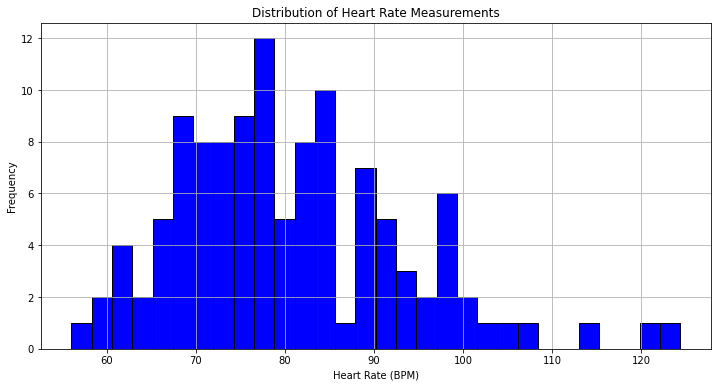

In [138]:
plt.figure(figsize=(12, 6))
plt.hist(hearth_rate_data['value'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Heart Rate Measurements')
plt.xlabel('Heart Rate (BPM)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

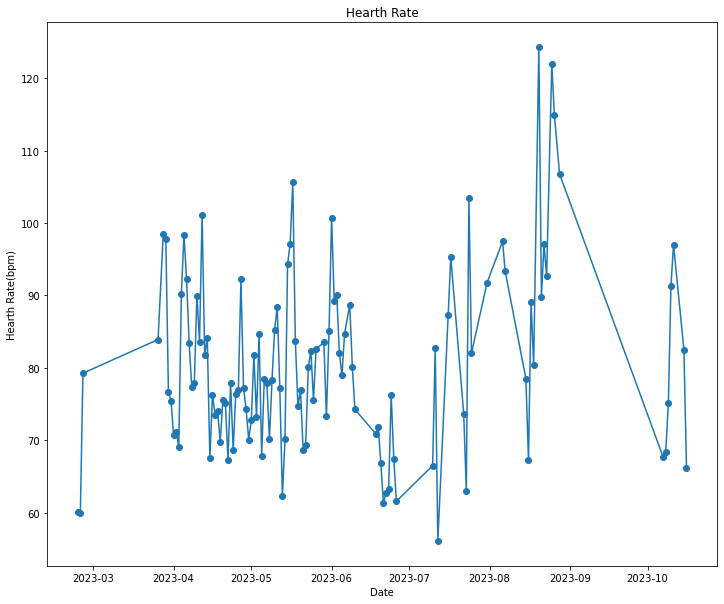

In [ ]:
# Plotting the hearth rate data
plt.figure(figsize=(12,10))
plt.plot(hearth_rate_data['startDate'], hearth_rate_data['value'], marker='o', linestyle='-')
plt.title("Hearth Rate")
plt.xlabel("Date")
plt.ylabel("Hearth Rate(bpm)")
plt.show()

#### Anomaly Detection Analysis

In [274]:
hearth_rate_data.columns.values[1] = "Hearth Rate"

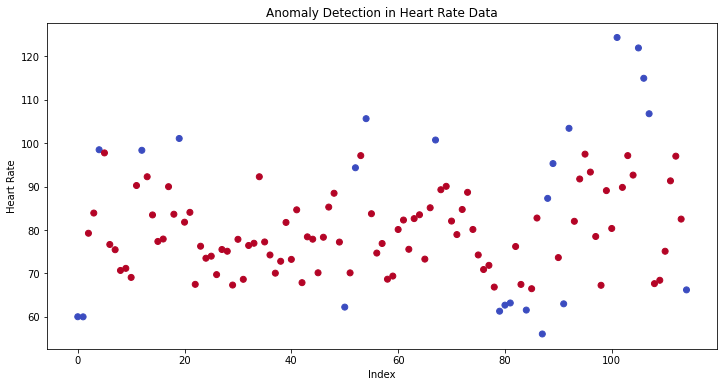

In [277]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Assuming your heart rate data is stored in a DataFrame named `hearth_rate_data`
model = IsolationForest(n_estimators=100, contamination='auto')
model.fit(hearth_rate_data[['Hearth Rate']])


hearth_rate_data['anomaly'] = model.predict(hearth_rate_data[['Hearth Rate']])

plt.figure(figsize=(12,6))
plt.scatter(hearth_rate_data.index, hearth_rate_data['Hearth Rate'], c=hearth_rate_data['anomaly'], cmap='coolwarm')
plt.title('Anomaly Detection in Heart Rate Data')
plt.xlabel('Index')
plt.ylabel('Heart Rate')
plt.show()



Lowest Hearth Rate is recorded as 40. 

### Physical Activities

#### Steps

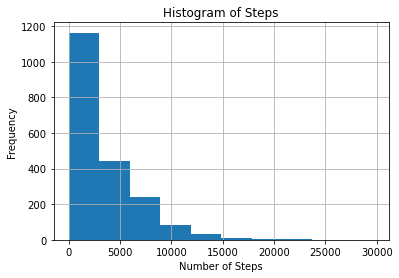

In [ ]:
steps_data['value'].hist()
plt.title('Histogram of Steps')
plt.xlabel('Number of Steps')
plt.ylabel('Frequency')
plt.show()


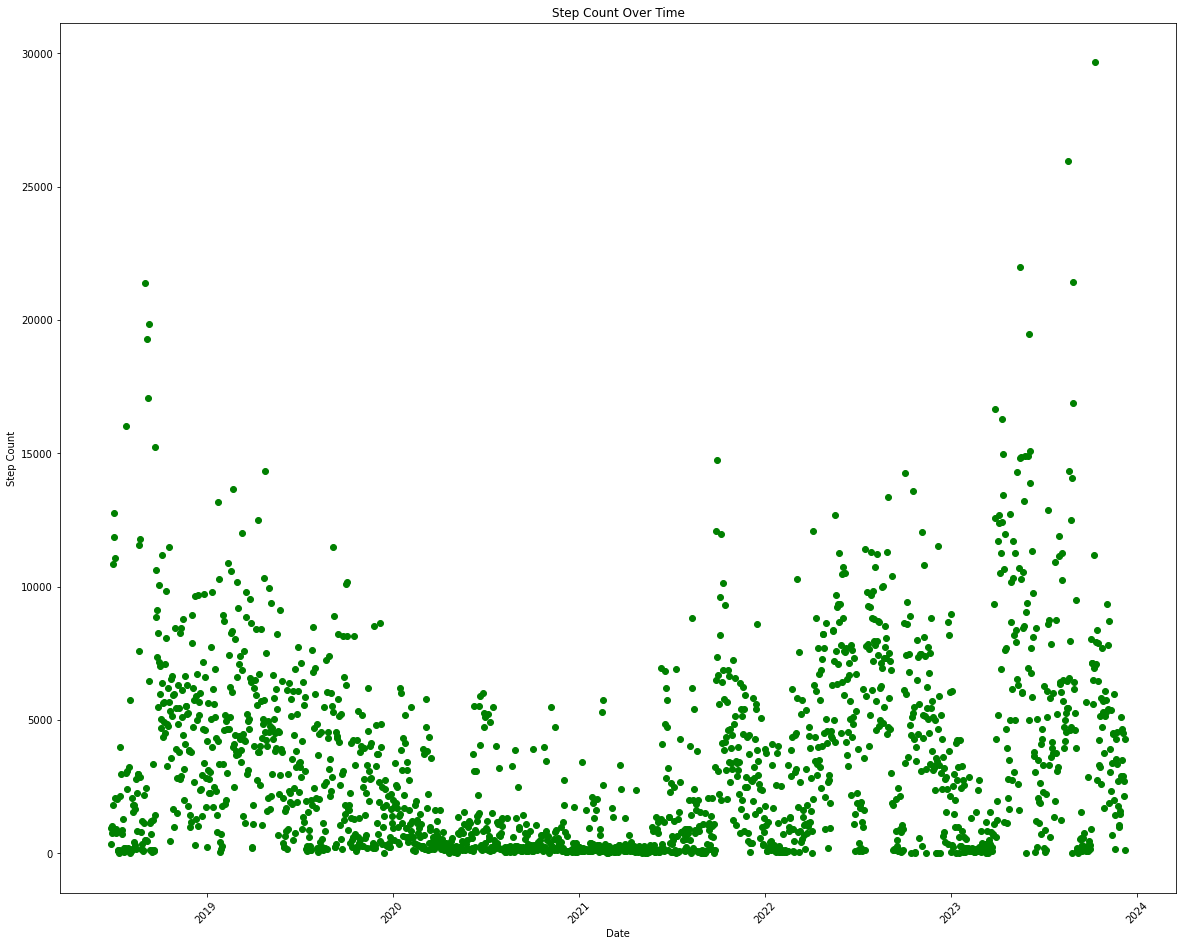

In [ ]:
# Plotting the step data
plt.figure(figsize=(20, 16))
plt.scatter(steps_data['startDate'], steps_data['value'], marker='o', linestyle='-', color='green')
plt.title('Step Count Over Time')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.xticks(rotation=45)
plt.show()


#### Walking + Running Distance

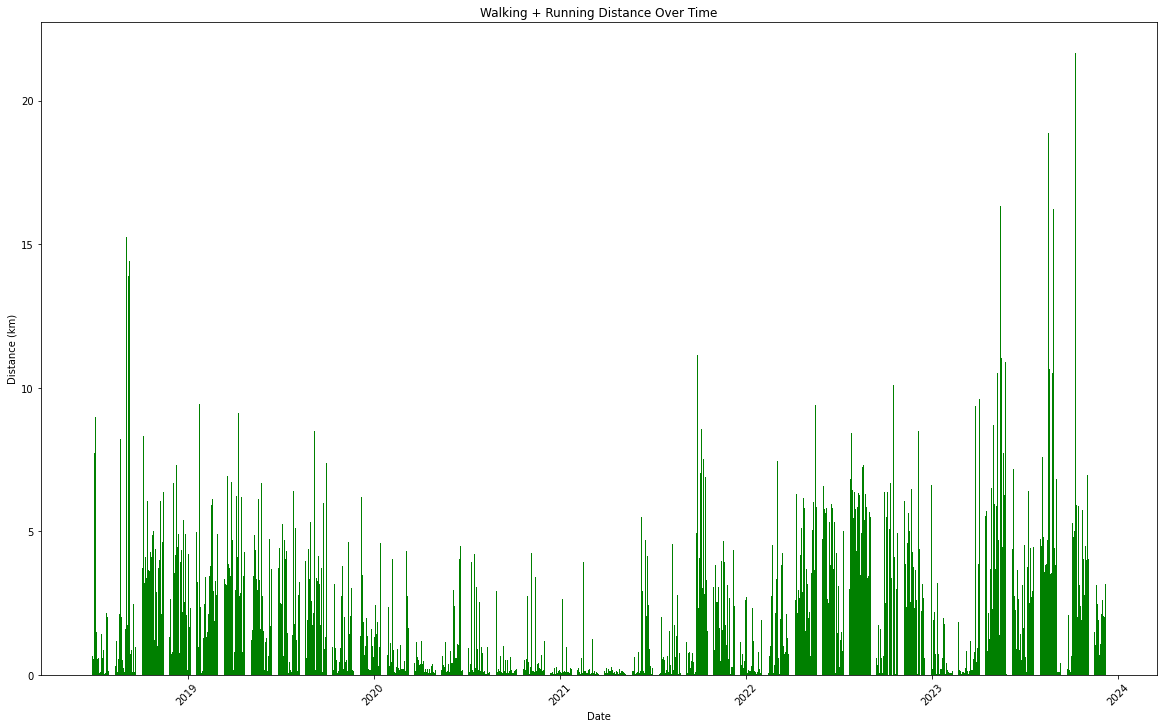

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt

# Line plot of distance over time
plt.figure(figsize=(20, 12))
plt.bar(walk_run_data['startDate'], walk_run_data['value'], linestyle='-', color='green')
plt.title('Walking + Running Distance Over Time')
plt.xlabel('Date')
plt.ylabel('Distance (km)')
plt.xticks(rotation=45)
plt.show()



#### Flights Climbed

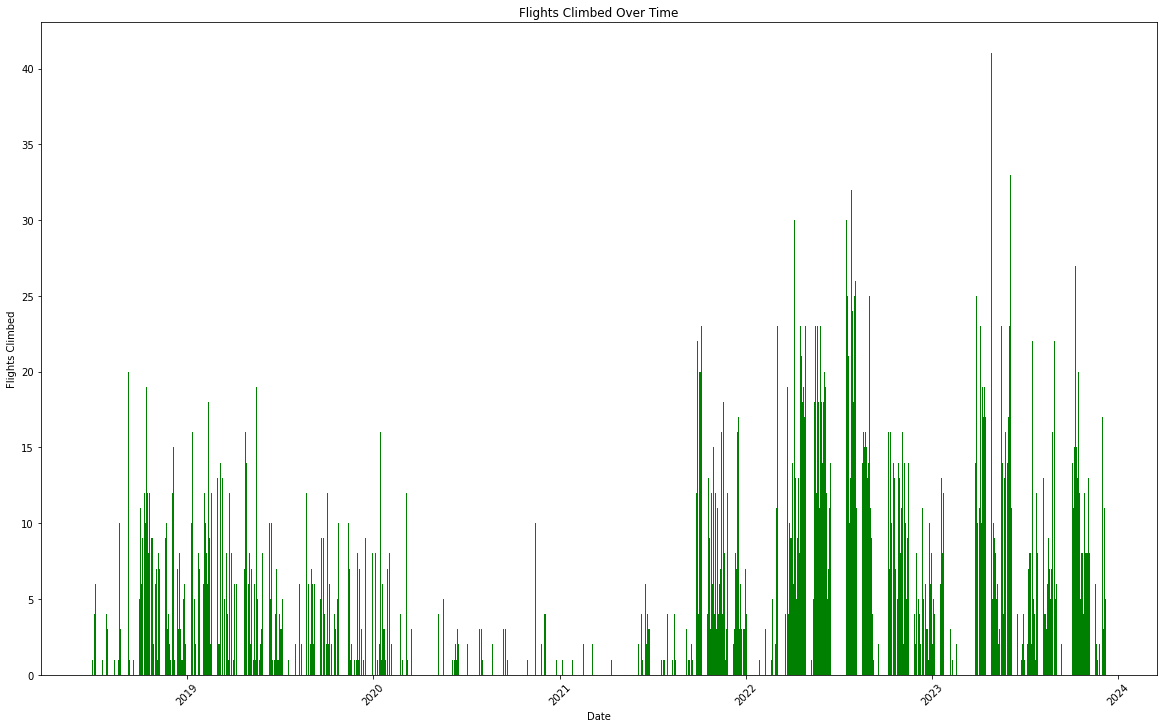

In [159]:
plt.figure(figsize=(20, 12))
plt.bar(stairs_data['startDate'], stairs_data['value'], linestyle='-', color='green')
plt.title('Flights Climbed Over Time')
plt.xlabel('Date')
plt.ylabel('Flights Climbed')
plt.xticks(rotation=45)
plt.show()

#### Energy Consumption

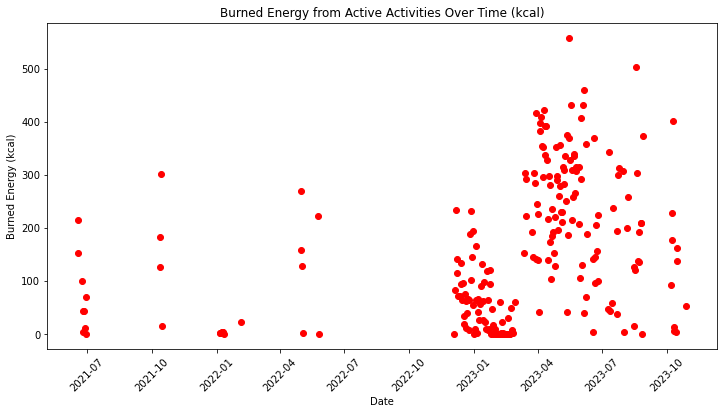

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(burned_energy_active['startDate'], burned_energy_active['value'], color='red')
plt.title('Burned Energy from Active Activities Over Time (kcal)')
plt.xlabel('Date')
plt.ylabel('Burned Energy (kcal)')
plt.xticks(rotation=45)
plt.show()


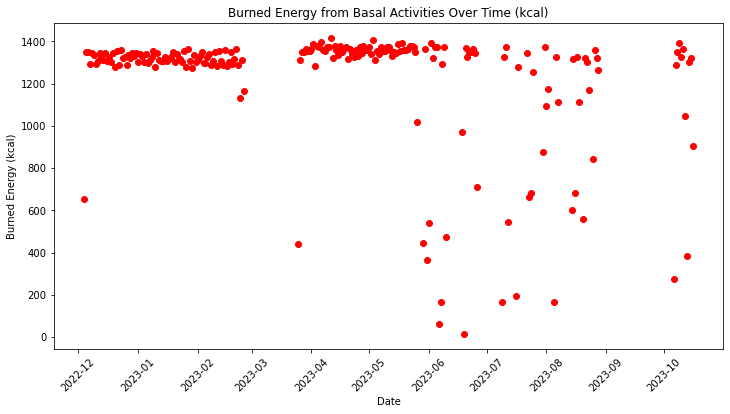

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(burned_energy_basal['startDate'], burned_energy_basal['value'], color='red')
plt.title('Burned Energy from Basal Activities Over Time (kcal)')
plt.xlabel('Date')
plt.ylabel('Burned Energy (kcal)')
plt.xticks(rotation=45)
plt.show()

### Sleep Analysis

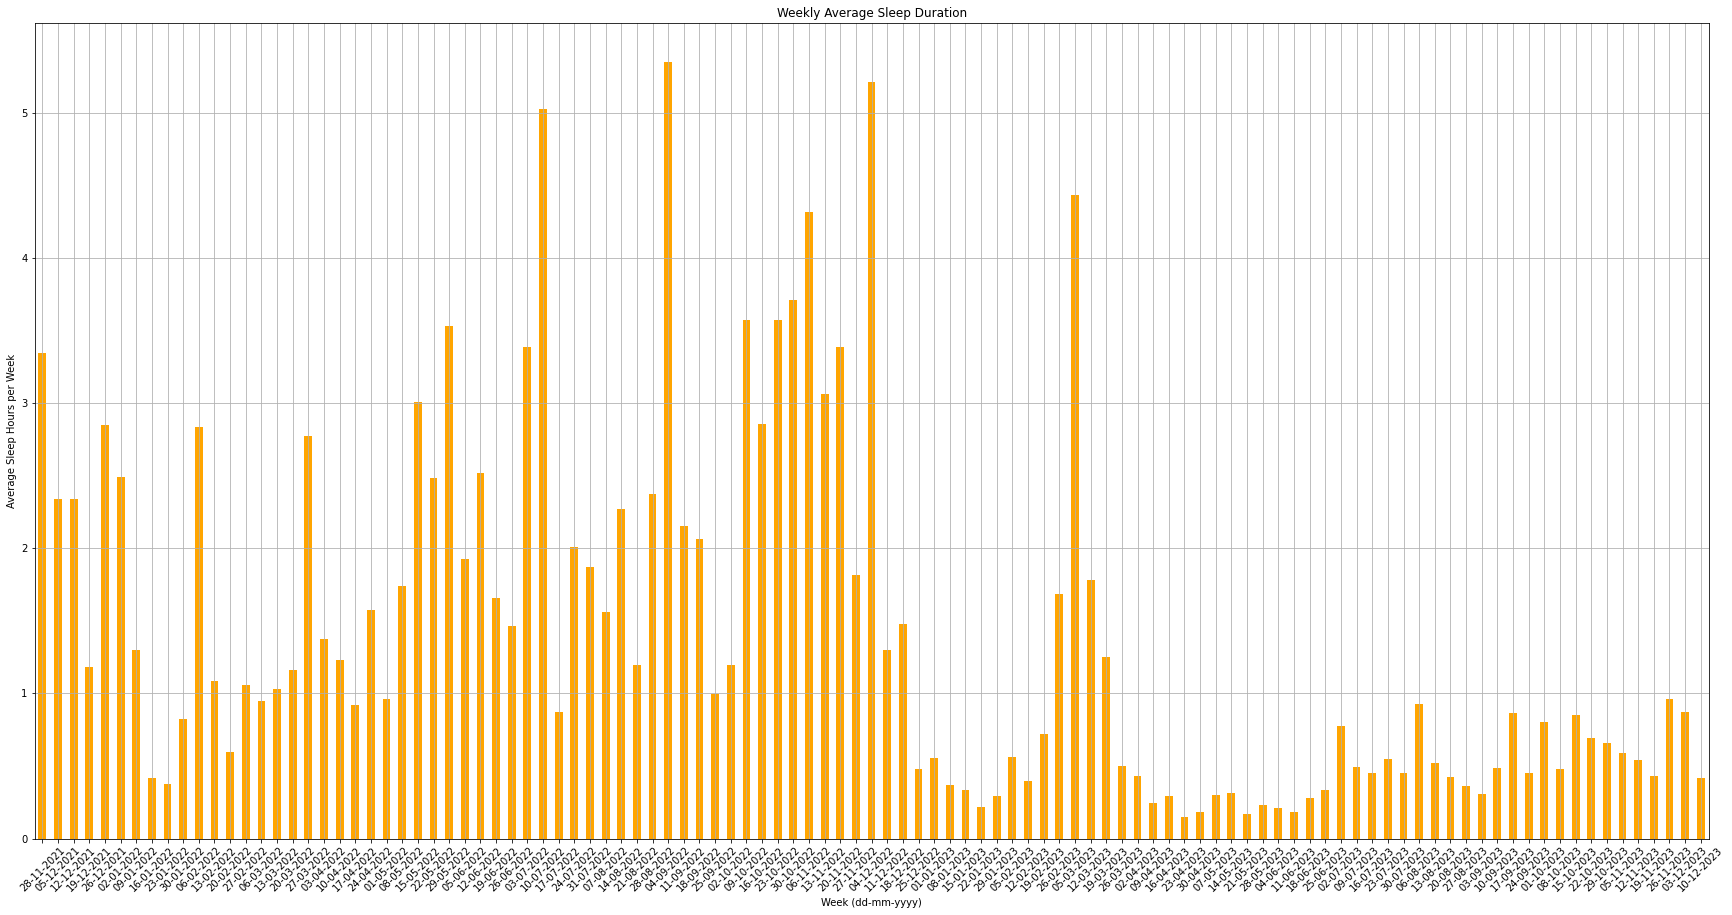

In [147]:
# Converting relevant columns to appropriate data types for sleep data
sleep_data['startDate'] = pd.to_datetime(sleep_data['startDate'])
sleep_data['endDate'] = pd.to_datetime(sleep_data['endDate'])
sleep_data['value'] = sleep_data['value'].astype(str)

# Calculating the duration of each sleep record
sleep_data['duration'] = (sleep_data['endDate'] - sleep_data['startDate']).dt.total_seconds() / 3600  # duration in hours

# Grouping the data by week and calculating the average sleep duration per week
sleep_data['date'] = sleep_data['startDate'].dt.date
weekly_sleep_duration = sleep_data.set_index('startDate').resample('W')['duration'].mean()

# Formatting the x-axis to show dates in 'dd-mm-yyyy' format
weekly_sleep_duration.index = weekly_sleep_duration.index.strftime('%d-%m-%Y')

# Plotting the weekly average sleep duration
plt.figure(figsize=(30, 15))
weekly_sleep_duration.plot(kind='bar', color='orange')
plt.title('Weekly Average Sleep Duration')
plt.xlabel('Week (dd-mm-yyyy)')
plt.ylabel('Average Sleep Hours per Week')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Headphone

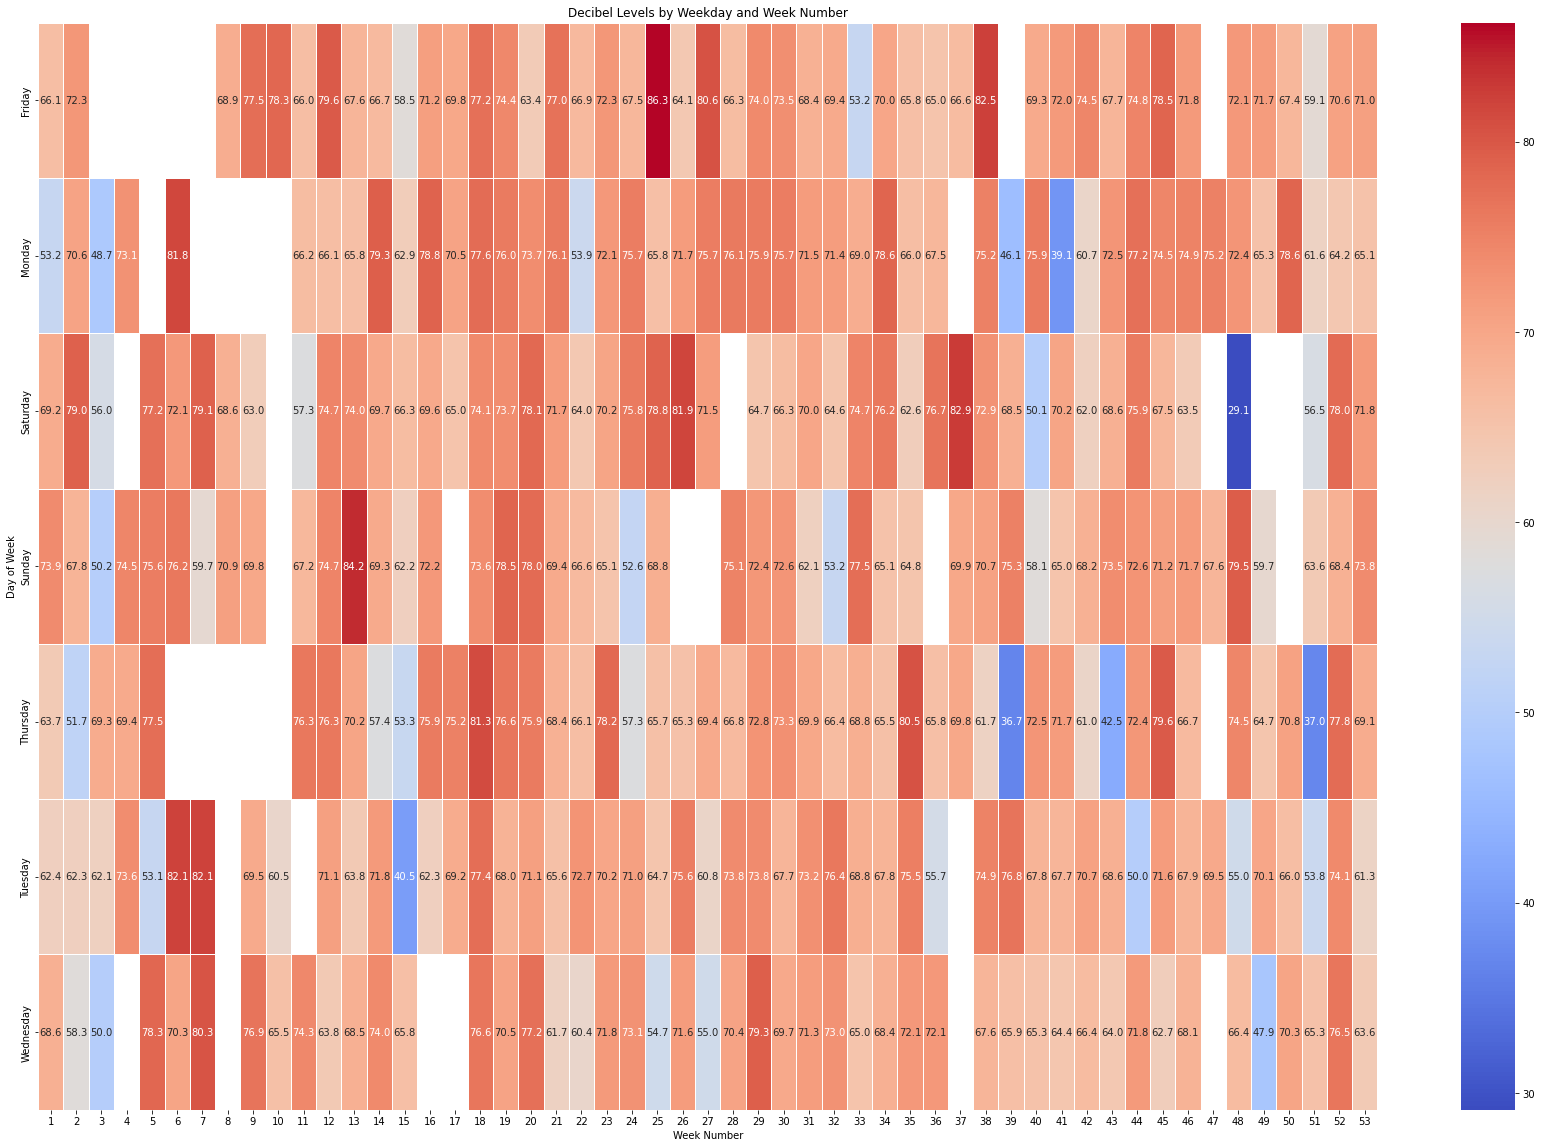

In [148]:
import seaborn as sns
headphone_data['startDate'] = pd.to_datetime(headphone_data['startDate'])
headphone_data['value'] = headphone_data['value'].astype(float)

# Group the data by week and calculate the mean decibel value for each week
headphone_data['week'] = headphone_data['startDate'].dt.isocalendar().week
headphone_data['day'] = headphone_data['startDate'].dt.day_name()
weekly_data = headphone_data.groupby(['week', 'day'])['value'].mean().reset_index()

# Create a pivot table for the heatmap
pivot_table = weekly_data.pivot('day', 'week', 'value')

# Create the heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, cmap='coolwarm')
plt.title('Decibel Levels by Weekday and Week Number')
plt.ylabel('Day of Week')
plt.xlabel('Week Number')
plt.show()

### Audio Exposure

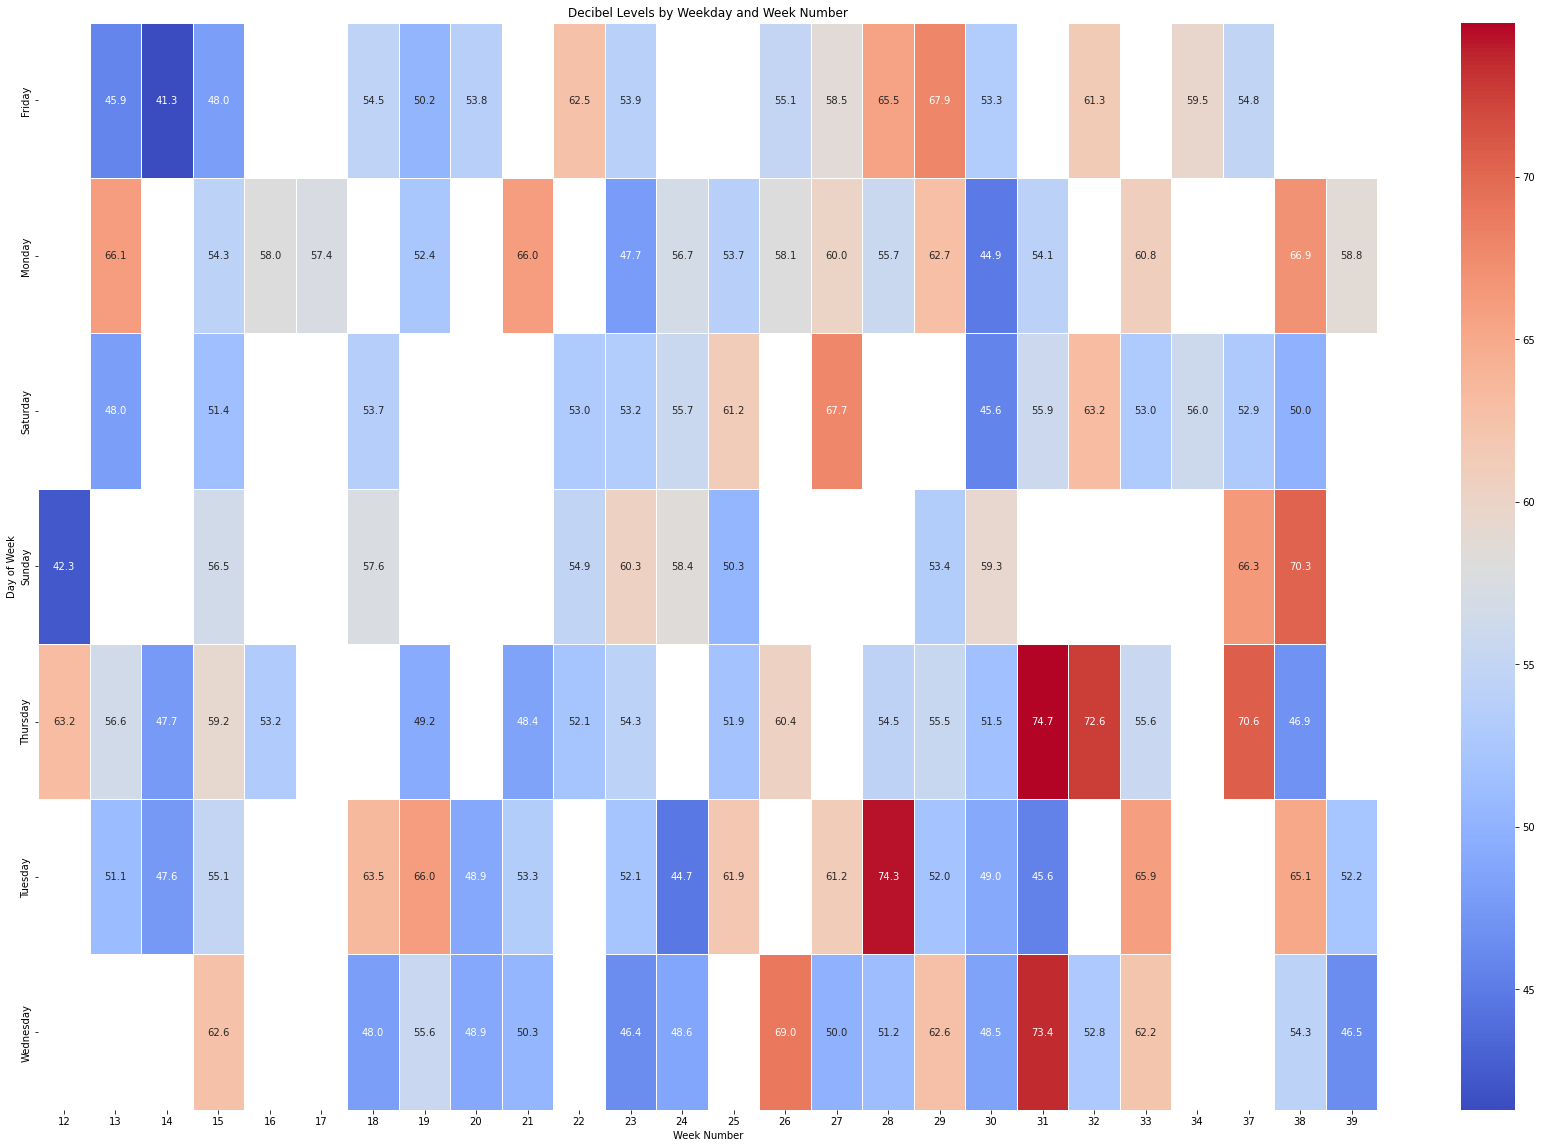

In [149]:
exposure_audio_data['startDate'] = pd.to_datetime(headphone_data['startDate'])
exposure_audio_data['value'] = exposure_audio_data['value'].astype(float)

# Group the data by week and calculate the mean decibel value for each week
exposure_audio_data['week'] = exposure_audio_data['startDate'].dt.isocalendar().week
exposure_audio_data['day'] = exposure_audio_data['startDate'].dt.day_name()
weekly_data = exposure_audio_data.groupby(['week', 'day'])['value'].mean().reset_index()

# Create a pivot table for the heatmap
pivot_table = weekly_data.pivot('day', 'week', 'value')

# Create the heatmap
plt.figure(figsize=(30, 20))
sns.heatmap(pivot_table, annot=True, fmt=".1f", linewidths=.5, cmap='coolwarm')
plt.title('Decibel Levels by Weekday and Week Number')
plt.ylabel('Day of Week')
plt.xlabel('Week Number')
plt.show()

# My Health Score

In this section, I focus on creating a singular "Health Score" from diverse health metrics: Steps, Heart Rate, Burned Energy Active, and Flights Climbed. My aim is to condense these varied data points into a comprehensive score between 0 and 100, reflecting overall health.

In [288]:
combined_data = pd.concat([steps_data['value'], hearth_rate_data['Hearth Rate'], burned_energy_active['value'], stairs_data['value']], axis=1) # Concatenating the dataframes

In [290]:
combined_data = combined_data.fillna(combined_data.mean()) # Filling the null values with the mean of the column

In [291]:
combined_data

,Steps,Hearth Rate,Burned Energy Active,Flights Climbed
0,337,60.024922,215.148064,3.00000
1,962,60.000000,152.363687,1.00000
2,1027,79.250000,100.631153,4.00000
3,757,83.900379,4.061038,4.00000
4,1810,98.482994,43.264429,10.00000
...,...,...,...,...
1980,4510,80.615188,151.731547,8.11326
1981,2722,80.615188,151.731547,8.11326
1982,2167,80.615188,151.731547,8.11326
1983,4269,80.615188,151.731547,8.11326


In [329]:
def calculate_health_score(row):
    # Modify these based on your health criteria and data
    steps_score = min((row['Steps'] / 10000) * 30, 30)
    heart_rate_score = 25 - (row['Hearth Rate'] - 60) / 4  # Example, adjust based on your data
    energy_score = min((row['Burned Energy Active'] / 500) * 30, 30)
    flights_score = min((row['Flights Climbed'] / 1) * 15, 15)

    total_score = steps_score + heart_rate_score + energy_score + flights_score
    return min(total_score, 100)

combined_data['health_score'] = combined_data.apply(calculate_health_score, axis=1)


In [338]:
combined_data.head()

,Steps,Hearth Rate,Burned Energy Active,Flights Climbed,health_score
0,337,60.024922,215.148064,3.0,53.913653
1,962,60.000000,152.363687,1.0,52.027821
2,1027,79.250000,100.631153,4.0,44.306369
3,757,83.900379,4.061038,4.0,36.539568
4,1810,98.482994,43.264429,10.0,38.405117


## Linear Reggression

In [331]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select features and label
X = combined_data[['Steps', 'Hearth Rate', 'Burned Energy Active', 'Flights Climbed']]  # replace with actual features
y = combined_data['health_score']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 3.4089357450074473


## Decision Tree

In [332]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Evaluate the model
tree_predictions = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_predictions)
print(f"Decision Tree MSE: {tree_mse}")


Decision Tree MSE: 0.8473912674888868


## Random Forest

In [333]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)

# Evaluate the model
forest_predictions = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_predictions)
print(f"Random Forest MSE: {forest_mse}")

Random Forest MSE: 0.7432448165241078


## Gradient Boosting 

In [334]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Evaluate the model
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Gradient Boosting MSE: {gb_mse}")


Gradient Boosting MSE: 0.4109281482899487


## SVR Boosting

In [335]:
from sklearn.svm import SVR

# Initialize and train the model
svr_model = SVR()
svr_model.fit(X_train, y_train)

# Evaluate the model
svr_predictions = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_predictions)
print(f"SVR MSE: {svr_mse}")


SVR MSE: 9.110262832567836


The Gradient Boosting Regressor produced the best results in terms of Mean Squared Error (MSE) after many machine learning models were investigated for predicting the health score based on data such as Steps, Heart Rate, Burned Energy Active, and Flights Climbed. A comparative study of multiple models, including the Linear Regression, Decision Tree, Random Forest, Support Vector (SVR), and Gradient Boosting Regressor models, led to this finding.